# Scientific Visualization
## Young Hydrologic Society
#### EGU 2022. May 26 2022

### Import libraries

In [1]:
import os
# Dataframe handling libraries
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


### Set up directories and load the datasets

In [2]:
project_dir = os.getcwd()
data_dir = os.path.join(project_dir, "plotting_data")
figures_dir = os.path.join(project_dir, "figures")

hydromet_data = pd.read_csv(os.path.join(data_dir, "CAMELS_GB_hydromet_timeseries_27003_19701001-20150930.csv"))
landcover_data = pd.read_csv(os.path.join(data_dir, "CAMELS_GB_landcover_attributes.csv"))
elev_data = pd.read_csv(os.path.join(data_dir, "CAMELS_GB_topographic_attributes.csv"))

### Explore the properties of the hydrometerological dataset: Columns, number of observations, data types

In [3]:
print(hydromet_data.shape)
print(hydromet_data.dtypes)

(16436, 11)
date               object
precipitation     float64
pet               float64
temperature       float64
discharge_spec    float64
discharge_vol     float64
peti              float64
humidity          float64
shortwave_rad     float64
longwave_rad      float64
windspeed         float64
dtype: object


In [4]:
hydromet_data[:5]

,date,precipitation,pet,temperature,discharge_spec,discharge_vol,peti,humidity,shortwave_rad,longwave_rad,windspeed
0,1970-10-01,5.86,1.78,11.89,0.63,14.14,2.07,6.57,67.65,343.34,8.07
1,1970-10-02,2.79,2.33,10.15,0.80,17.86,2.68,5.31,110.89,305.07,10.71
2,1970-10-03,1.58,2.15,10.37,0.86,19.24,2.43,5.19,117.93,299.61,7.19
3,1970-10-04,1.40,0.00,12.03,0.64,14.26,0.34,9.39,54.61,350.29,7.28
4,1970-10-05,3.05,1.15,12.07,0.68,15.32,1.41,7.56,76.17,337.95,7.39


### Plot time series: Precipitation vs Date
- Using matplotlib
- Using seaborn

In [5]:
data_x = hydromet_data.date[:540]
data_y1 = hydromet_data.discharge_spec[:540]
data_y2 = hydromet_data.precipitation[:540]

In [7]:
# Plotting precipitation:
plot_loc = plot_labels = data_x[::90]

# Matplotlib
fig, ax = plt.subplots()
plt.title("Matplotlib")
bar = ax.bar(data_x, data_y2, fill = 'steelblue', label = "precipitation")
ax.set_ylabel ("Precipitation")
ax.set_ylim ((0,40))
ax1 = ax.twinx()
line = ax1.plot(data_x, data_y1, c = 'orange', label = "discharge")
ax1.plot([],[], c = 'steelblue', label = 'precpitation')
ax1.set_ylabel ("Specific discharge")
ax1.set_ylim((0,20))
ax.set_xticks(plot_loc)
ax.tick_params(axis = 'x', rotation = 20)
plt.legend()
plt.savefig(os.path.join(figures_dir,"mpl_pp_dis_line.png"), dpi = 300)
plt.close()

# Seaborn
fig, ax = plt.subplots()
plt.title("Seaborn")
sns.barplot(data_x, data_y2, color = "steelblue",label = "precipitation", ax = ax)
ax1 = ax.twinx()
sns.lineplot(data_x, data_y1, color = "orange", label = "discharge", ax = ax1)
ax1.plot([],[], c = 'steelblue', label = 'precpitation')
ax.set_ylim ((0,40))
ax1.set_ylim((0,20))
ax.set_xticks(plot_loc)
ax.tick_params(axis = 'x', rotation = 20)
plt.legend()
plt.savefig(os.path.join(figures_dir,"sea_pp_dis_line.png"), dpi = 300)
plt.close()

c:\Anaconda3-2020.11\envs\ds-envsci-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3-2020.11\envs\ds-envsci-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Plot categorical scatterplot

In [6]:
plot_data = pd.merge(landcover_data, elev_data, on = ["gauge_id"])

c:\Anaconda3-2020.11\envs\ds-envsci-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3-2020.11\envs\ds-envsci-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


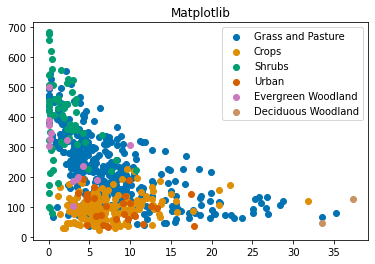

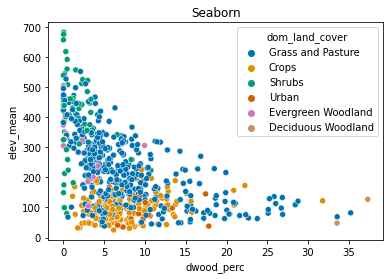

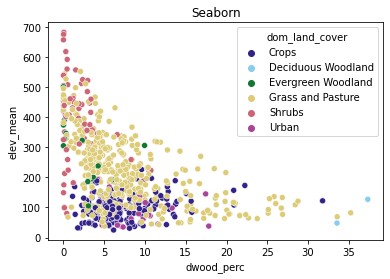

In [22]:
# Matplotlib
lc_list = list(plot_data.dom_land_cover.unique())

plt.figure()
plt.title("Matplotlib")
for l in lc_list:
    subset = plot_data[plot_data.dom_land_cover==l]
    plt.scatter(subset["dwood_perc"], subset["elev_mean"], label = l)
plt.legend()
plt.savefig(os.path.join(figures_dir,"mpl_scatter_diff_col.png"), dpi = 300)

# Seaborn
plt.figure()
plt.title("Seaborn")
sns.scatterplot("dwood_perc", "elev_mean", hue = "dom_land_cover", data = plot_data)
plt.savefig(os.path.join(figures_dir,"sea_scatter_diff_col.png"), dpi = 300)

# Seaborn
seabornmap = ["#332288", "#88CCEE", "#117733", "#DDCC77", "#CC6677","#AA4499"]#sns.set_palette(palette="colorblind", n_colors = 6)
plt.figure()
plt.title("Seaborn")
sns.scatterplot("dwood_perc", "elev_mean", hue = "dom_land_cover", palette = seabornmap, hue_order = ["Crops", "Deciduous Woodland", "Evergreen Woodland", "Grass and Pasture", "Shrubs", "Urban"], data = plot_data)
plt.savefig(os.path.join(figures_dir,"sea_scatter_colorblind_col.png"), dpi = 300)